<a href="https://colab.research.google.com/github/day28645/Applied-Data-Science/blob/main/week6_adult_dataset_continue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ref: website => https://www.linkedin.com/pulse/introduction-exploratory-data-analysis-kaushik-mani

Ref: website => https://medium.com/geekculture/cluster-analysis-on-adult-dataset-9ac3e8263aff

### Required libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Download dataset

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age", "work-class", "fnlwgt", "education", "education-num","marital-status", "occupation", "relationship",
           "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
#data = pd.read_csv(url, names=columns, sep=',', na_values='?', skipinitialspace =True)
data = pd.read_csv(url, names=columns)

### Exploring data

In [ ]:
data.head()

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


####Basic information

In [ ]:
# Age Statistics
print("Age Statistics")
print(data['age'].describe().round(2))
print("Median Age: ", data['age'].median())

Age Statistics
count    32561.00
mean        38.58
std         13.64
min         17.00
25%         28.00
50%         37.00
75%         48.00
max         90.00
Name: age, dtype: float64
Median Age:  37.0


In [ ]:
# Work-class Statistics
print("Work-class Statistics")
print(data['work-class'].describe())

Work-class Statistics
count        32561
unique           9
top        Private
freq         22696
Name: work-class, dtype: object


In [ ]:
# fnlwgt Statistics
print("fnlwgt Statistics")
print(data['fnlwgt'].describe().round(2))

fnlwgt Statistics
count      32561.00
mean      189778.37
std       105549.98
min        12285.00
25%       117827.00
50%       178356.00
75%       237051.00
max      1484705.00
Name: fnlwgt, dtype: float64


In [ ]:
# education Statistics
print("education Statistics")
print(data['education'].describe())

education Statistics
count        32561
unique          16
top        HS-grad
freq         10501
Name: education, dtype: object


In [ ]:
# education-num Statistics
print("education-num Statistics")
print(data['education-num'].describe().round(2))

education-num Statistics
count    32561.00
mean        10.08
std          2.57
min          1.00
25%          9.00
50%         10.00
75%         12.00
max         16.00
Name: education-num, dtype: float64


In [ ]:
# marital-status Statistics
print("marital-status Statistics")
print(data['marital-status'].describe())

marital-status Statistics
count                   32561
unique                      7
top        Married-civ-spouse
freq                    14976
Name: marital-status, dtype: object


In [ ]:
# occupation Statistics
print("occupation Statistics")
print(data['occupation'].describe())

occupation Statistics
count               32561
unique                 15
top        Prof-specialty
freq                 4140
Name: occupation, dtype: object


In [ ]:
# relationship Statistics
print("relationship Statistics")
print(data['relationship'].describe())

relationship Statistics
count        32561
unique           6
top        Husband
freq         13193
Name: relationship, dtype: object


In [ ]:
# race Statistics
print("race Statistics")
print(data['race'].describe())

race Statistics
count      32561
unique         5
top        White
freq       27816
Name: race, dtype: object


In [ ]:
# sex Statistics
print("sex Statistics")
print(data['sex'].describe())

sex Statistics
count     32561
unique        2
top        Male
freq      21790
Name: sex, dtype: object


In [ ]:
# capital-gain Statistics
print("capital-gain Statistics")
print(data['capital-gain'].describe().round(2))

capital-gain Statistics
count    32561.00
mean      1077.65
std       7385.29
min          0.00
25%          0.00
50%          0.00
75%          0.00
max      99999.00
Name: capital-gain, dtype: float64


In [ ]:
# capital-loss Statistics
print("capital-loss Statistics")
print(data['capital-loss'].describe().round(2))

capital-loss Statistics
count    32561.00
mean        87.30
std        402.96
min          0.00
25%          0.00
50%          0.00
75%          0.00
max       4356.00
Name: capital-loss, dtype: float64


In [ ]:
# hours-per-week Statistics
print("hours-per-week Statistics")
print(data['hours-per-week'].describe().round(2))

hours-per-week Statistics
count    32561.00
mean        40.44
std         12.35
min          1.00
25%         40.00
50%         40.00
75%         45.00
max         99.00
Name: hours-per-week, dtype: float64


In [ ]:
# native-country Statistics
print("native-country Statistics")
print(data['native-country'].describe())

native-country Statistics
count              32561
unique                42
top        United-States
freq               29170
Name: native-country, dtype: object


In [ ]:
# income Statistics
print("income Statistics")
print(data['income'].describe())

income Statistics
count      32561
unique         2
top        <=50K
freq       24720
Name: income, dtype: object


#### Check missing information

In [ ]:
#To see the frequency list of each column to understand which columns include '?' as a value.
data.loc[data['native-country'].str.contains('\?')].head(5)

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K


In [ ]:
#Check frequency table again to be sure if there is '?', or not.
data['work-class'].value_counts()

,count
work-class,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [ ]:
#Check frequency table again to be sure if there is '?', or not.
data['education'].value_counts()

,count
education,
HS-grad,10501
Some-college,7291
Bachelors,5355
Masters,1723
Assoc-voc,1382
11th,1175
Assoc-acdm,1067
10th,933
7th-8th,646


In [ ]:
#Check frequency table again to be sure if there is '?', or not.
data['marital-status'].value_counts()

,count
marital-status,
Married-civ-spouse,14976
Never-married,10683
Divorced,4443
Separated,1025
Widowed,993
Married-spouse-absent,418
Married-AF-spouse,23


In [ ]:
#Check frequency table again to be sure if there is '?', or not.
data['relationship'].value_counts()

,count
relationship,
Husband,13193
Not-in-family,8305
Own-child,5068
Unmarried,3446
Wife,1568
Other-relative,981


In [ ]:
#Check frequency table again to be sure if there is '?', or not.
data['race'].value_counts()

,count
race,
White,27816
Black,3124
Asian-Pac-Islander,1039
Amer-Indian-Eskimo,311
Other,271


In [ ]:
#Check frequency table again to be sure if there is '?', or not.
data['sex'].value_counts()

,count
sex,
Male,21790
Female,10771


In [ ]:
#Check frequency table again to be sure if there is '?', or not.
data['occupation'].value_counts()

,count
occupation,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
?,1843
Transport-moving,1597


In [ ]:
#Replace '?' to 'Prof-specialty'
data['occupation'].loc[data['occupation'].str.contains('\?')]=' Prof-specialty'

<ipython-input-33-f32ea842f075>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['occupation'].loc[data['occupation'].str.contains('\?')]=' Prof-specialty'


In [ ]:
#Check frequency table again to be sure if there is '?', or not.
data['occupation'].value_counts()

,count
occupation,
Prof-specialty,5983
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
Transport-moving,1597
Handlers-cleaners,1370


In [ ]:
#Check frequency table again to be sure if there is '?', or not.
data['income'].value_counts()

,count
income,
<=50K,24720
>50K,7841


In [ ]:
#check ? in 'native-country'.
data['native-country'].value_counts()

,count
native-country,
United-States,29170
Mexico,643
?,583
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100


In [ ]:
print(data.shape)

(32561, 15)


#### Visualization

#####  Histograms

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>,
        <Axes: title={'center': 'education-num'}>],
       [<Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

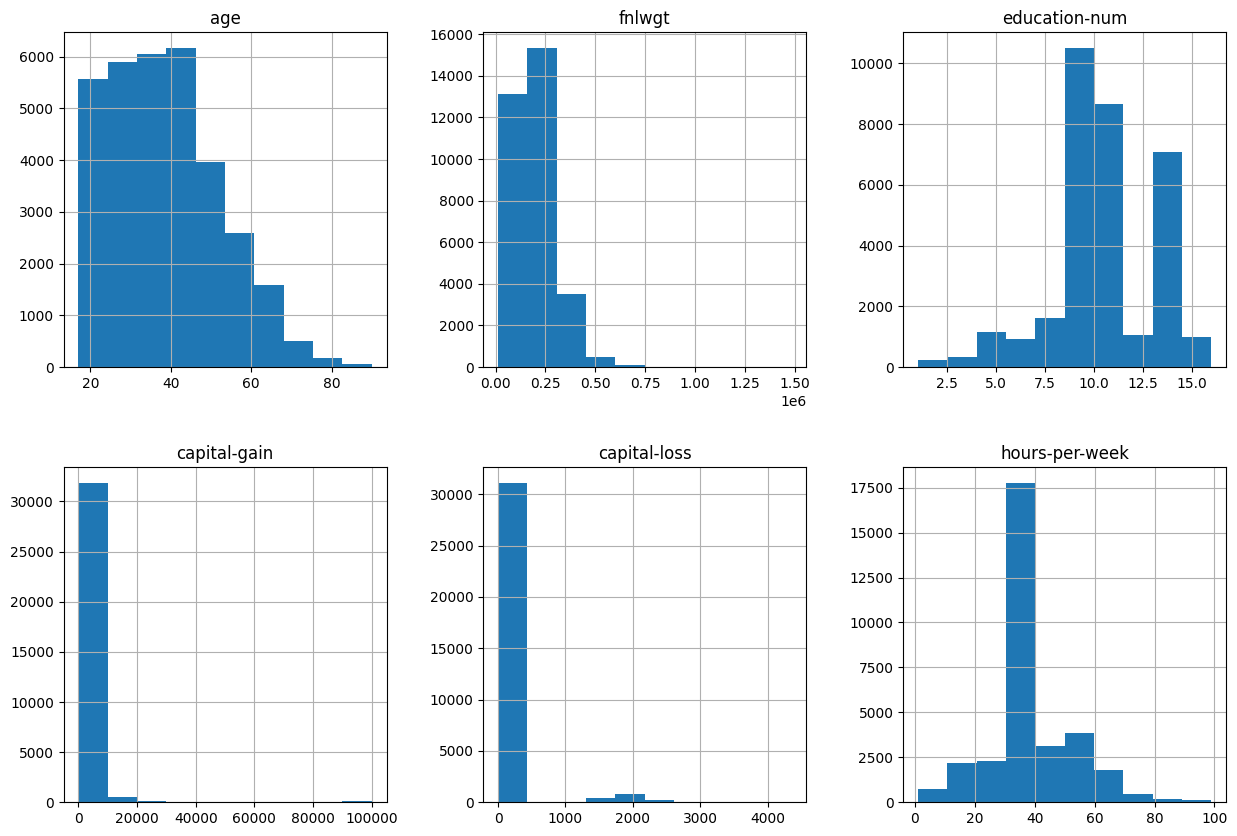

In [ ]:
#Plot histogram for numerical values.
numerical_attributes = data.select_dtypes(include=['int'])
numerical_attributes.hist(figsize=(15,10), layout=(2, 3))

<Axes: xlabel='work-class', ylabel='count'>

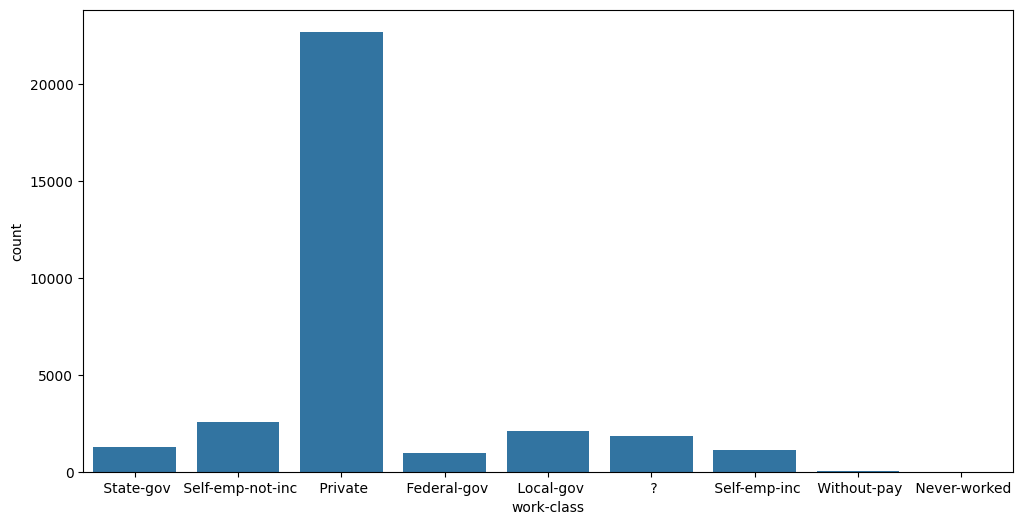

In [ ]:
#Plot histogram for categorical values (workclass).
# Plotting count plot for categorical values
categorical_attributes = data.select_dtypes(include=['object'])
# Work-class Count plot
plt.figure(figsize=(12,6))
sns.countplot(data = categorical_attributes, x = "work-class")

<Axes: xlabel='education', ylabel='count'>

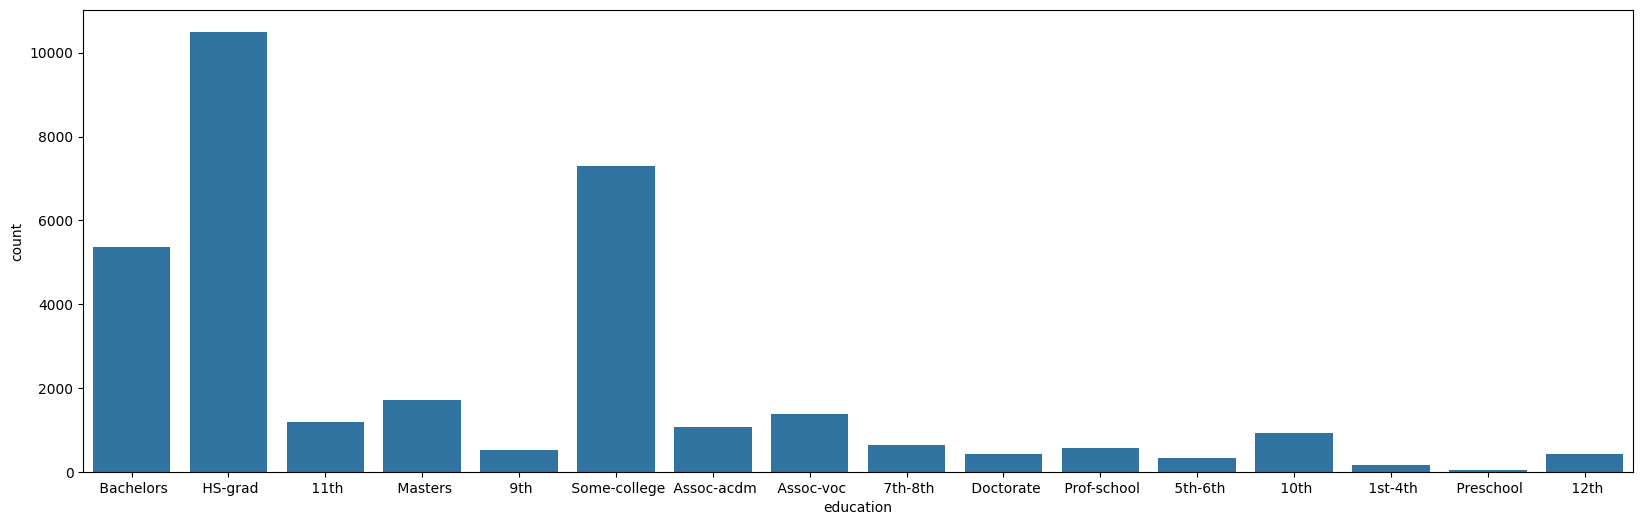

In [ ]:
# education Count plot
plt.figure(figsize=(20,6))
sns.countplot(data = categorical_attributes, x = "education")

<Axes: xlabel='marital-status', ylabel='count'>

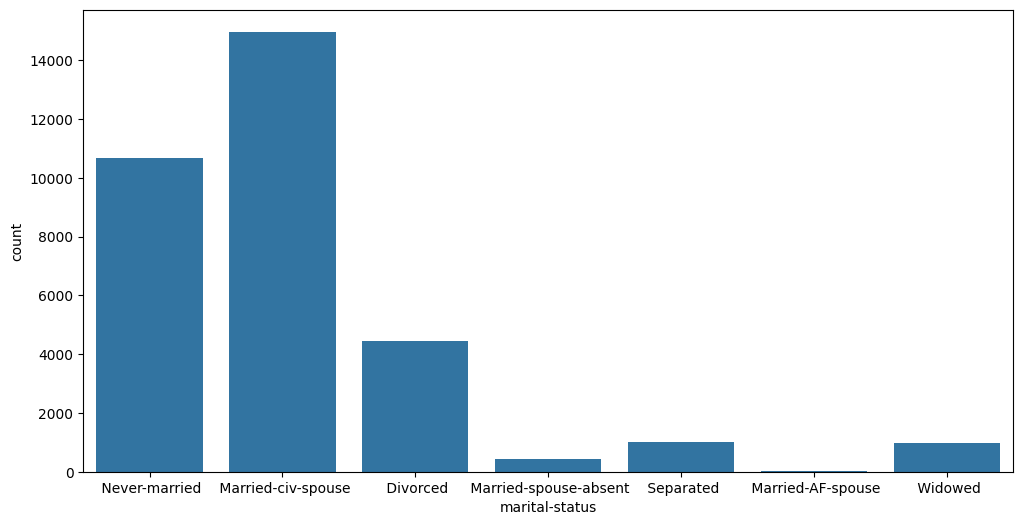

In [ ]:
# marital-status Count plot
plt.figure(figsize=(12,6))
sns.countplot(data = categorical_attributes, x = "marital-status")

<Axes: xlabel='occupation', ylabel='count'>

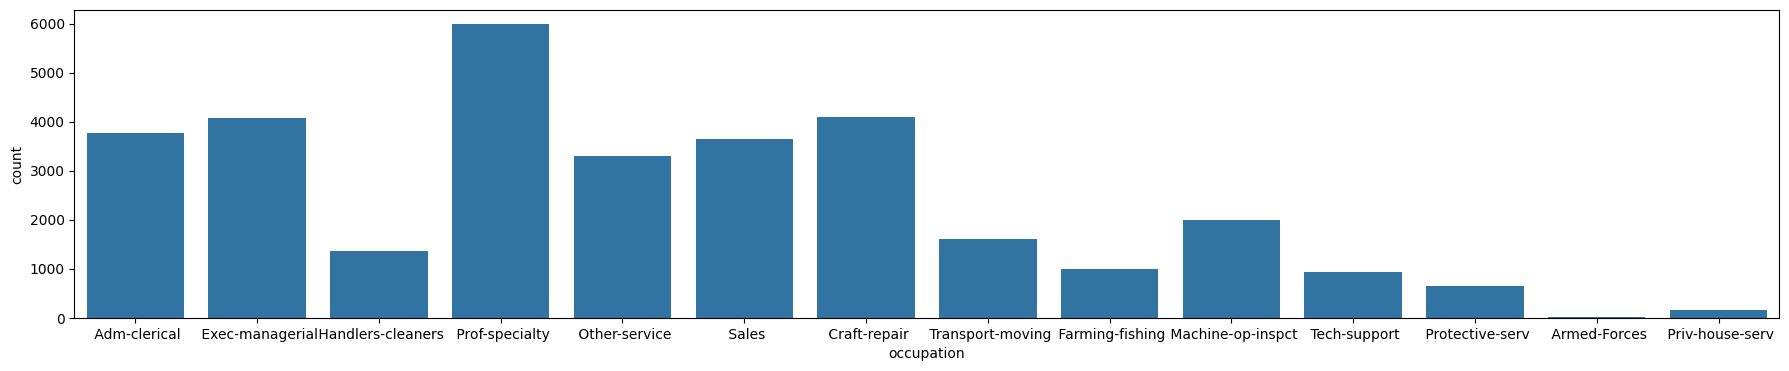

In [ ]:
# occupation Count plot
plt.figure(figsize=(22,4))
sns.countplot(data = categorical_attributes, x = "occupation")

<Axes: xlabel='relationship', ylabel='count'>

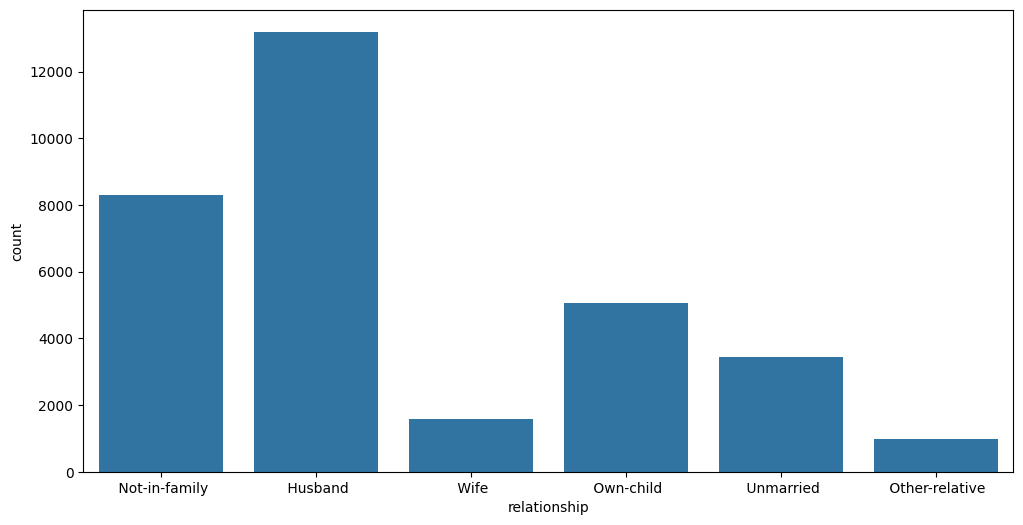

In [ ]:
# relationship Count plot
plt.figure(figsize=(12,6))
sns.countplot(data = categorical_attributes, x = "relationship")

<Axes: xlabel='race', ylabel='count'>

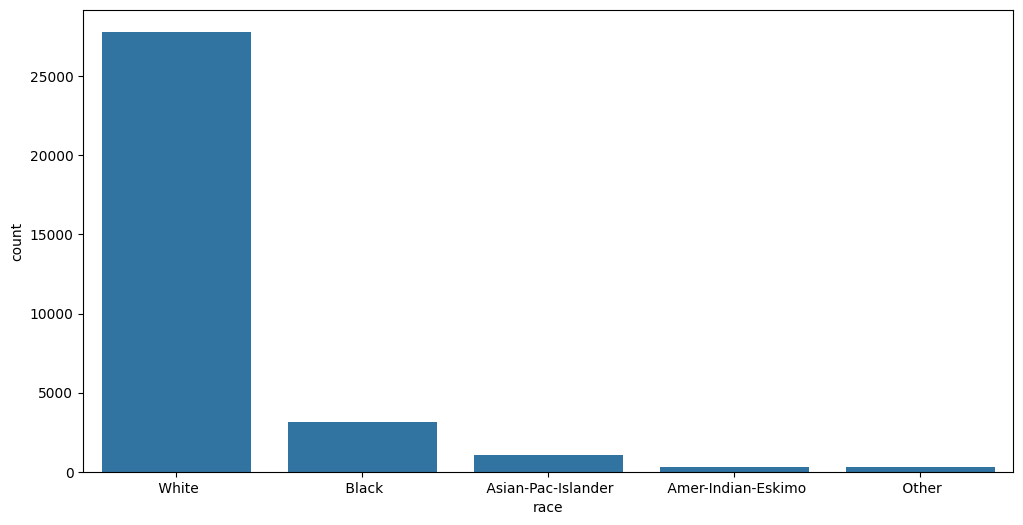

In [ ]:
# race Count plot
plt.figure(figsize=(12,6))
sns.countplot(data = categorical_attributes, x = "race")

<Axes: xlabel='sex', ylabel='count'>

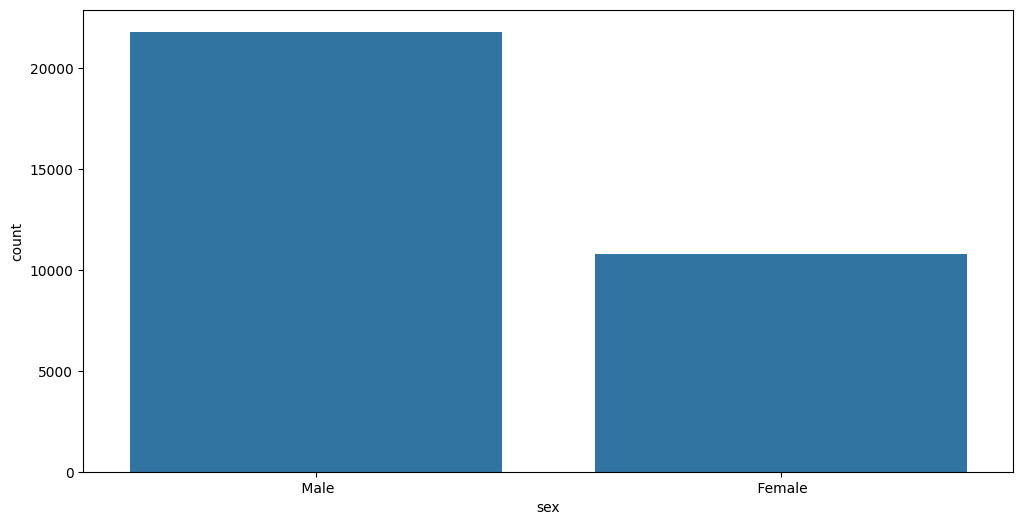

In [ ]:
# sex Count plot
plt.figure(figsize=(12,6))
sns.countplot(data = categorical_attributes, x = "sex")

<Axes: xlabel='income', ylabel='count'>

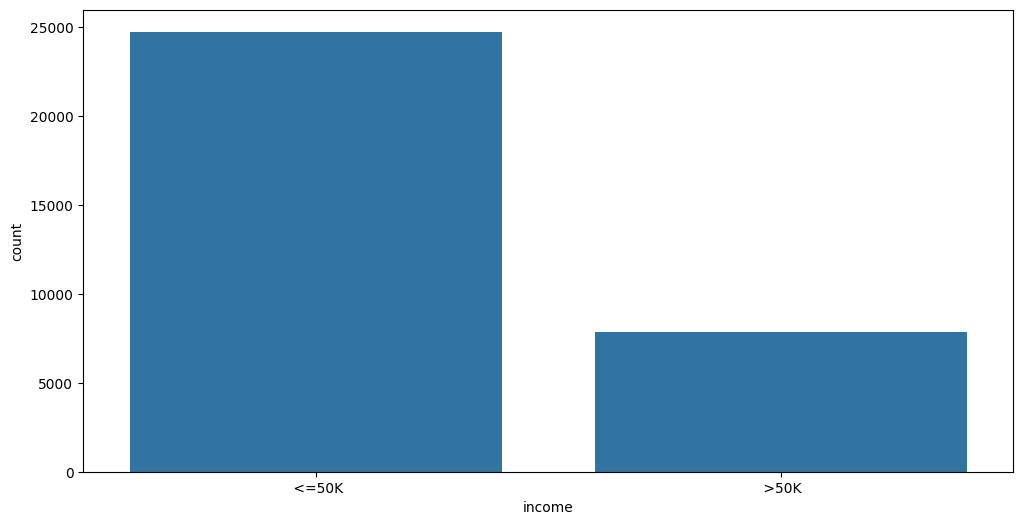

In [ ]:
# income Count plot
plt.figure(figsize=(12,6))
sns.countplot(data = categorical_attributes, x = "income")

<Axes: xlabel='native-country', ylabel='count'>

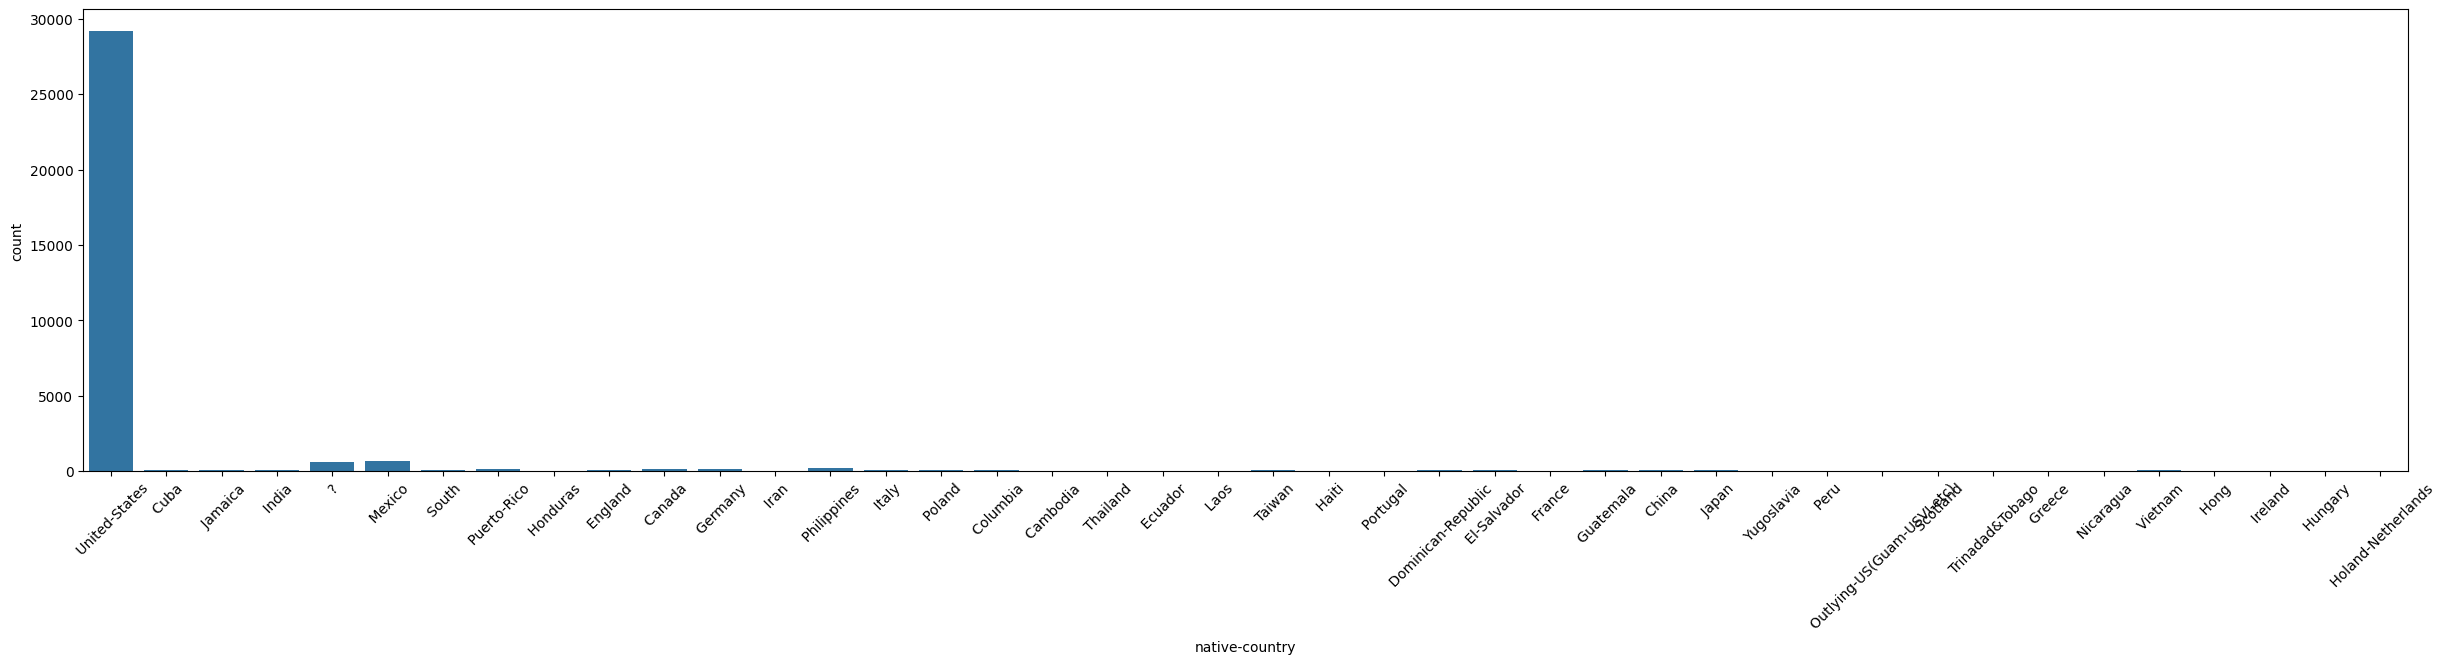

In [ ]:
# native-country Count plot
# education Count plot
plt.figure(figsize=(30,6))
plt.xticks(rotation=45)
sns.countplot(data = categorical_attributes, x = "native-country")

##### Grouping Data


In [ ]:
columns = ["age", "work-class", "fnlwgt", "education", "education-num","marital-status", "occupation", "relationship",
           "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
data = pd.read_csv(url, names=columns, sep=',', na_values='?', skipinitialspace =True)

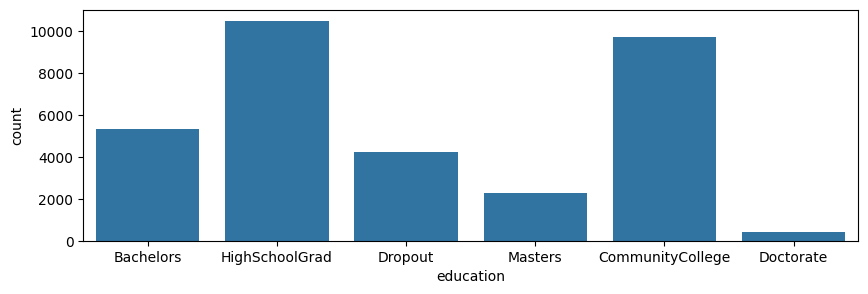

In [ ]:
# grouping education
data['education'].replace({
    'Preschool': 'Dropout',
    '10th': 'Dropout',
    '11th': 'Dropout',
    '12th': 'Dropout',
    '1st-4th': 'Dropout',
    '5th-6th': 'Dropout',
    '7th-8th': 'Dropout',
    '9th': 'Dropout',
    'HS-Grad': 'HighSchoolGrad',
    'HS-grad': 'HighSchoolGrad',
    'Some-college': 'CommunityCollege',
    'Assoc-acdm': 'CommunityCollege',
    'Assoc-voc': 'CommunityCollege',
    'Prof-school': 'Masters'
}, inplace=True)

# Create a countplot
fig = plt.figure(figsize=(10, 3))
sns.countplot(x="education", data=data)
plt.xlabel("education")
plt.ylabel("count")
plt.show()

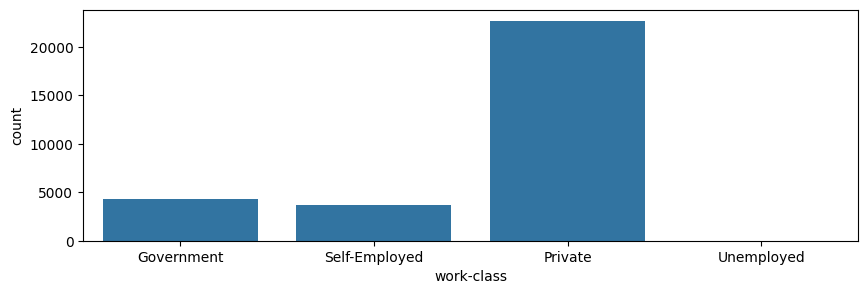

In [ ]:
# grouping work-class
data['work-class'].replace({
    'Private': 'Private',
    'Self-emp-not-inc': 'Self-Employed',
    'Local-gov': 'Government',
    'State-gov': 'Government',
    'Self-emp-inc': 'Self-Employed',
    'Federal-gov': 'Government',
    'Without-pay': 'Unemployed',
    'Never-worked': 'Unemployed',
}, inplace=True)

# Create a countplot
fig = plt.figure(figsize=(10, 3))
sns.countplot(x="work-class", data=data)
plt.xlabel("work-class")
plt.ylabel("count")
plt.show()

<Axes: xlabel='native-country', ylabel='count'>

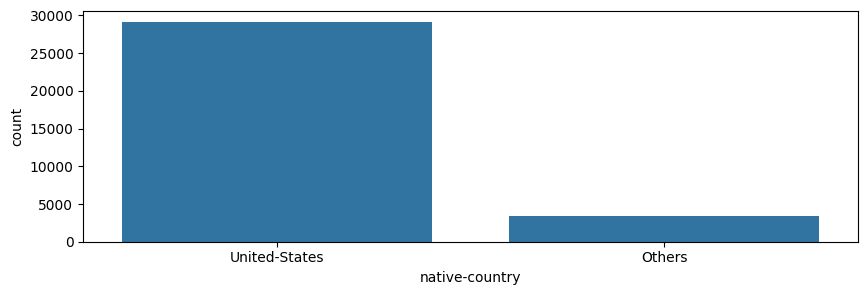

In [ ]:
# grouping native-country
data['native-country'] = data['native-country'].apply(lambda el: "United-States" if el == "United-States" else "Others")
# Plotting count plot for native-country
fig = plt.figure(figsize=(10,3))
sns.countplot(x="native-country", data=data)

In [ ]:
data['work-class'].value_counts()

,count
work-class,
Private,22696
Government,4351
Self-Employed,3657
Unemployed,21


##### Dropping the missing values

In [ ]:
#Check missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   work-class      30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
print("missing value count for occupation ", data['occupation'].isnull().sum())
print("missing value count for work-class ", data['work-class'].isnull().sum())
print("missing value count for native-country ", data['native-country'].isnull().sum()) #before was 583

missing value count for occupation  1843
missing value count for work-class  1836
missing value count for native-country  0


In [ ]:
# Dropping missing values
data = data.dropna()
# Dropping outlier
i = data[data['capital-gain'] > 80000].index
data = data.drop(i)
# Dropping the column fnlwgt
data = data.drop(columns='fnlwgt')
# Combining capital-gain and capital-loss into 1 column
data['netcapitalgain'] = data.apply(lambda x: x['capital-gain'] + x['capital-loss'], axis=1)
data = data.drop(columns='capital-gain')
data = data.drop(columns='capital-loss')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30563 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30563 non-null  int64 
 1   work-class      30563 non-null  object
 2   education       30563 non-null  object
 3   education-num   30563 non-null  int64 
 4   marital-status  30563 non-null  object
 5   occupation      30563 non-null  object
 6   relationship    30563 non-null  object
 7   race            30563 non-null  object
 8   sex             30563 non-null  object
 9   hours-per-week  30563 non-null  int64 
 10  native-country  30563 non-null  object
 11  income          30563 non-null  object
 12  netcapitalgain  30563 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 3.3+ MB


In [ ]:
data.describe()

,age,education-num,hours-per-week,netcapitalgain
count,30563.000000,30563.000000,30563.000000,30563.000000
mean,38.404312,10.115892,40.903151,693.863364
std,13.118141,2.554885,11.965517,2590.163958
min,17.000000,1.000000,1.000000,0.000000
25%,28.000000,9.000000,40.000000,0.000000
50%,37.000000,10.000000,40.000000,0.000000
75%,47.000000,13.000000,45.000000,0.000000
max,90.000000,16.000000,99.000000,41310.000000


##### Correlation Matrix

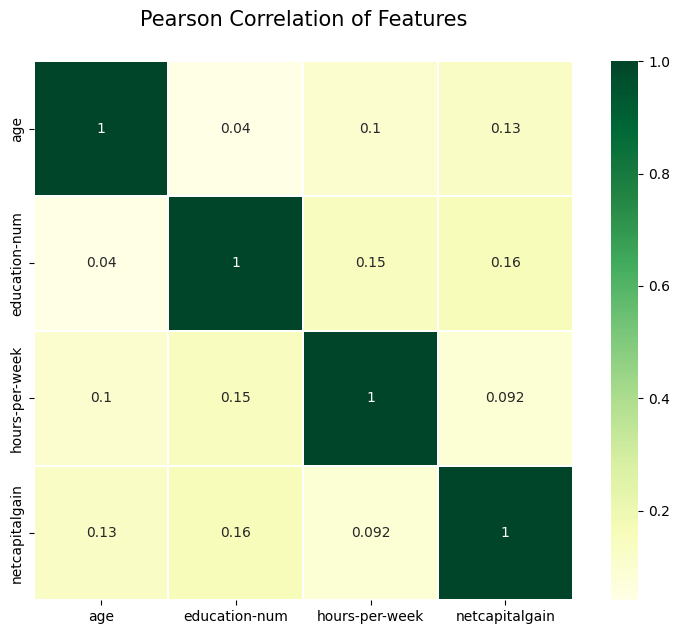

In [ ]:
# Compute the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])
corr = numeric_data.corr()

# Create the heatmap
f, ax = plt.subplots(figsize=(10, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)
plt.title('Pearson Correlation of Features', y=1.05, size=15)
plt.show()

##### Cross tabulation


In [ ]:
pd.crosstab(data['education'],data['sex'], margins=True)

sex,Female,Male,All
education,,,
Bachelors,1544,3598,5142
CommunityCollege,3397,5706,9103
Doctorate,83,303,386
Dropout,1138,2680,3818
HighSchoolGrad,3139,6806,9945
Masters,607,1562,2169
All,9908,20655,30563


In [ ]:
pd.crosstab(data['relationship'],data['work-class'], margins=True)

work-class,Government,Private,Self-Employed,Unemployed,All
relationship,,,,,
Husband,1796,8510,2276,4,12586
Not-in-family,1172,5996,677,0,7845
Other-relative,86,774,58,0,918
Own-child,442,3866,210,5,4523
Unmarried,585,2477,203,2,3267
Wife,262,991,168,3,1424
All,4343,22614,3592,14,30563


##### Box Plot

<Axes: xlabel='education', ylabel='age'>

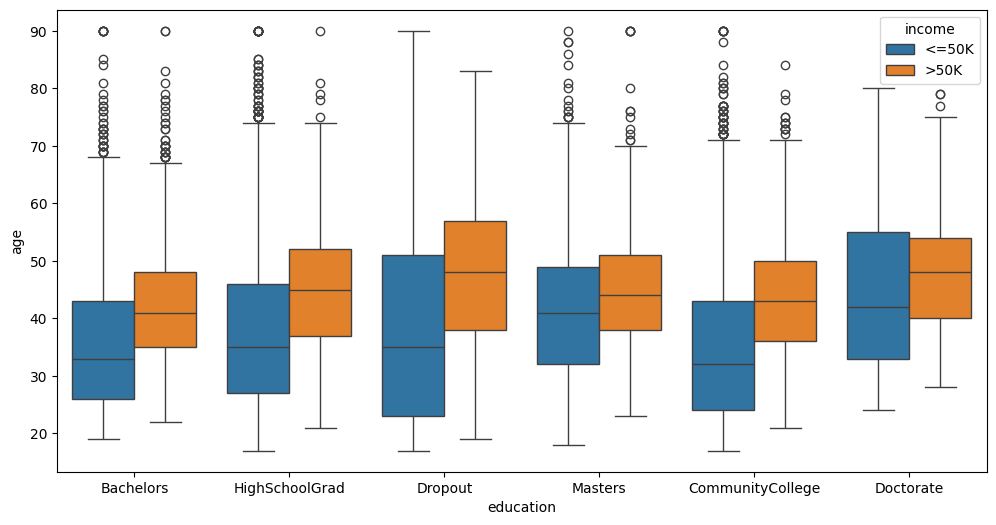

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="education",y="age", hue="income", data=data)

<Axes: xlabel='race', ylabel='hours-per-week'>

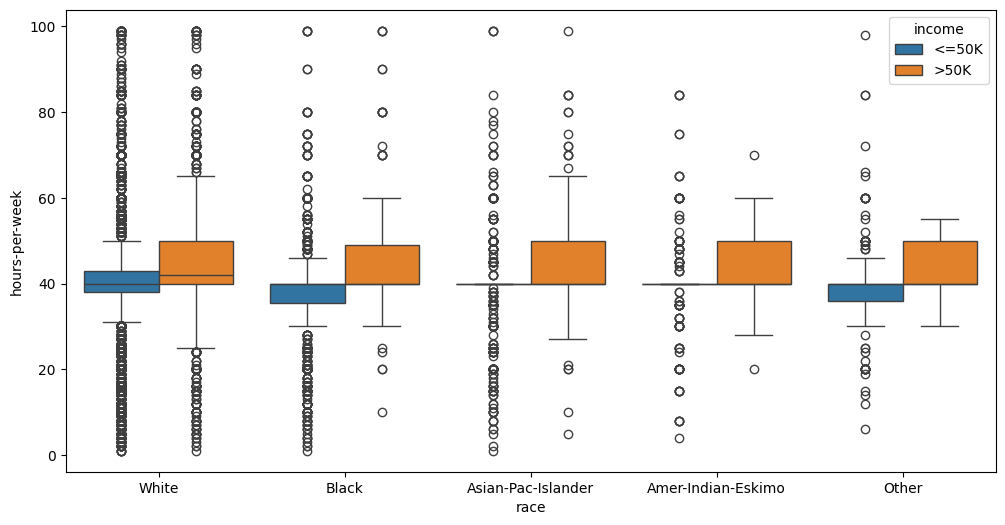

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="race",y="hours-per-week", hue="income", data=data)

##### Pair Plot

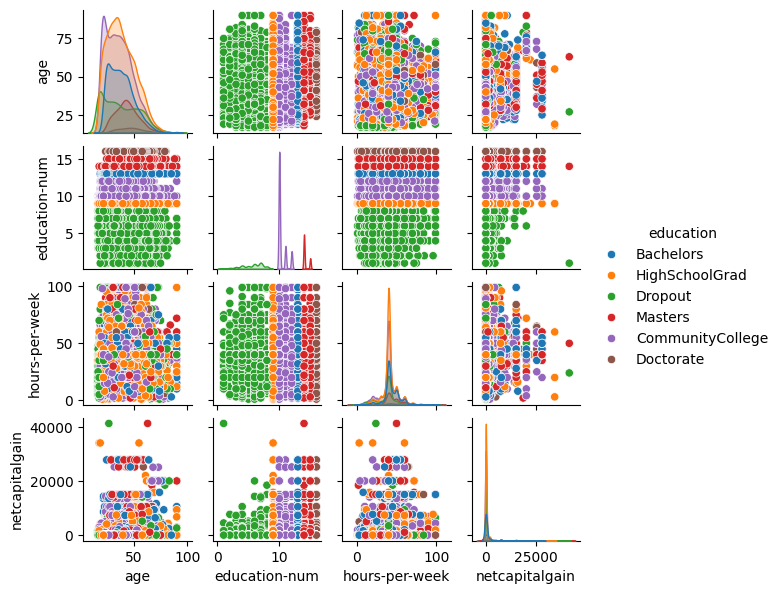

In [ ]:
sns.pairplot(data, height=1.5, diag_kind='kde', hue='education')

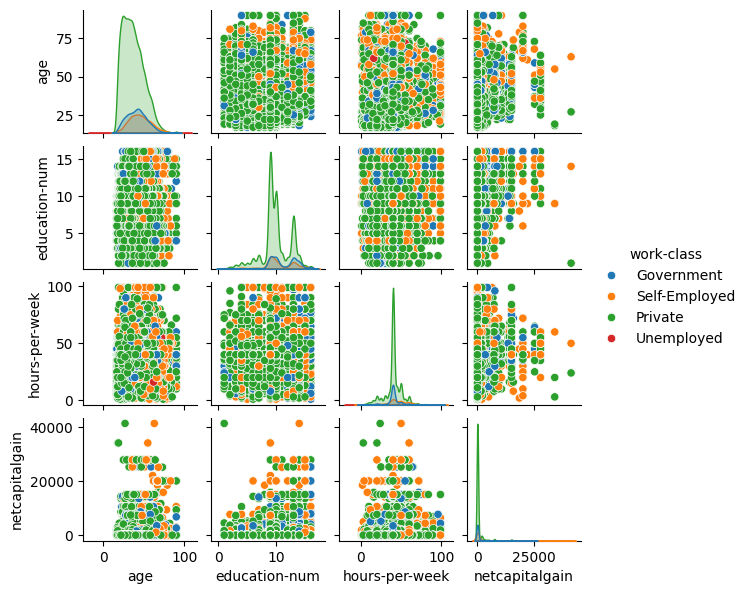

In [ ]:
sns.pairplot(data, height=1.5, diag_kind = 'kde', hue='work-class')

## All Example Code

#### Handle outliers

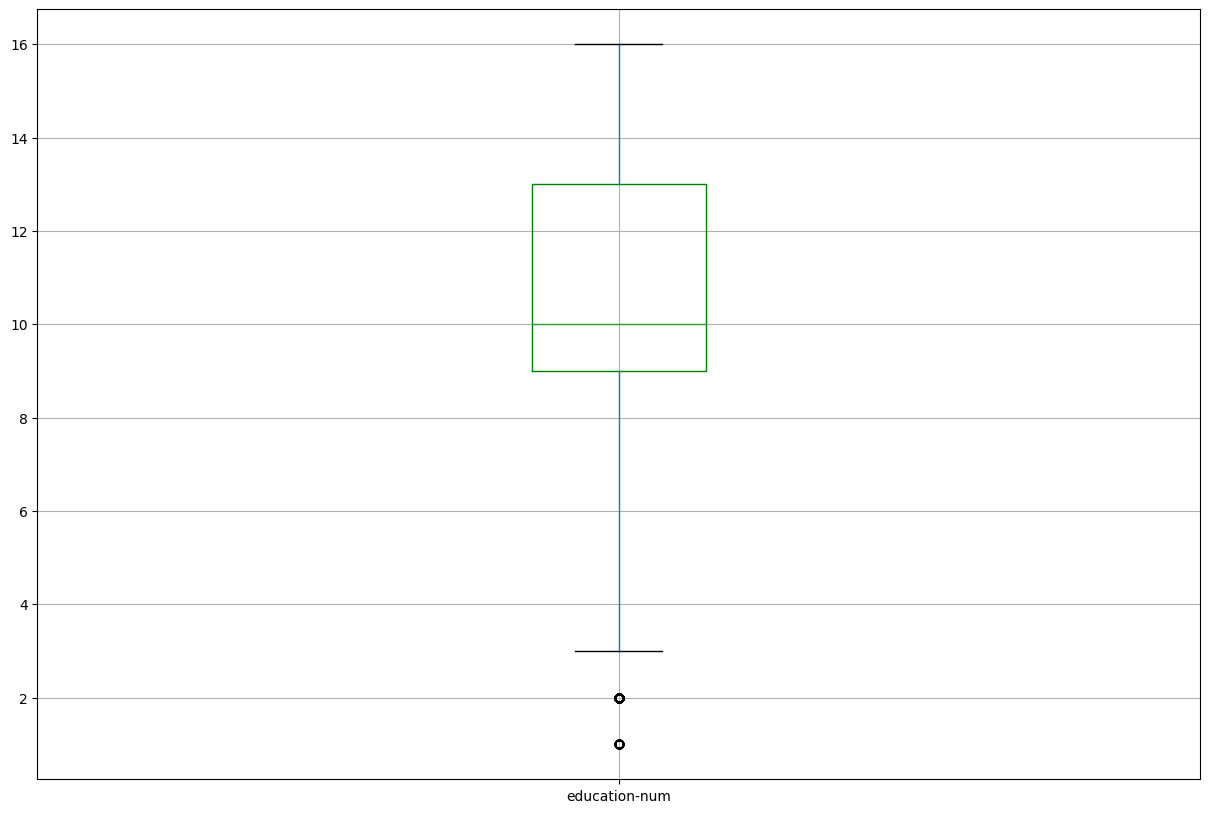

In [ ]:
#Boxplot for 'education-num'.
boxplot = data.boxplot(column=['education-num'],figsize=(15, 10),boxprops=dict(color='green'))

**Numeric** Outlier
This is the simplest, nonparametric outlier detection method in a one dimensional feature space. Here outliers are calculated by means of the IQR (InterQuartile Range).The first and the third quartile (Q1, Q3) are calculated. An outlier is then a data point x_i that lies outside the interquartile range. Using the interquartile multiplier value k=1, the range limits are the typical upper and lower whiskers of a box plot.

In [ ]:
#Write a function to calculate IOR for each numerical attribute and show skewness
def detection_outlier(dfcolumn):
 #Calculate Q1, Q3 and IQR
  Q1 = dfcolumn.quantile(0.25)
  Q3 = dfcolumn.quantile(0.75)
  IQR = Q3-Q1 #Interquartile range
 #In general, constant should be 1.
  lower  = Q1-1*IQR
  higher = Q3+1*IQR
 #Find number of outliers for specific column
  print('Before data preprocessing:')
  print('Skewness:',dfcolumn.skew())
  print(dfcolumn.describe())
  dfcolumn.loc[(dfcolumn> higher) | (dfcolumn< lower)]=dfcolumn.mean()
  print('After replacing outliers by mean:')
  print('Skewness:',dfcolumn.skew())
  print('Median:',dfcolumn.median())
  print('IQR value:',IQR)
  print('Lower,Higher:',lower,',',higher)
  return

In [ ]:
detection_outlier(data['education-num'])

Before data preprocessing:
Skewness: -0.31627114270227447
count    30563.000000
mean        10.115892
std          2.554885
min          1.000000
25%          9.000000
50%         10.000000
75%         13.000000
max         16.000000
Name: education-num, dtype: float64
After replacing outliers by mean:
Skewness: 0.282695485263192
Median: 10.0
IQR value: 4.0
Lower,Higher: 5.0 , 17.0


<ipython-input-65-272b19c180c1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcolumn.loc[(dfcolumn> higher) | (dfcolumn< lower)]=dfcolumn.mean()
<ipython-input-65-272b19c180c1>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '10.11589176455191' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dfcolumn.loc[(dfcolumn> higher) | (dfcolumn< lower)]=dfcolumn.mean()


#### Relationships among the attributes.

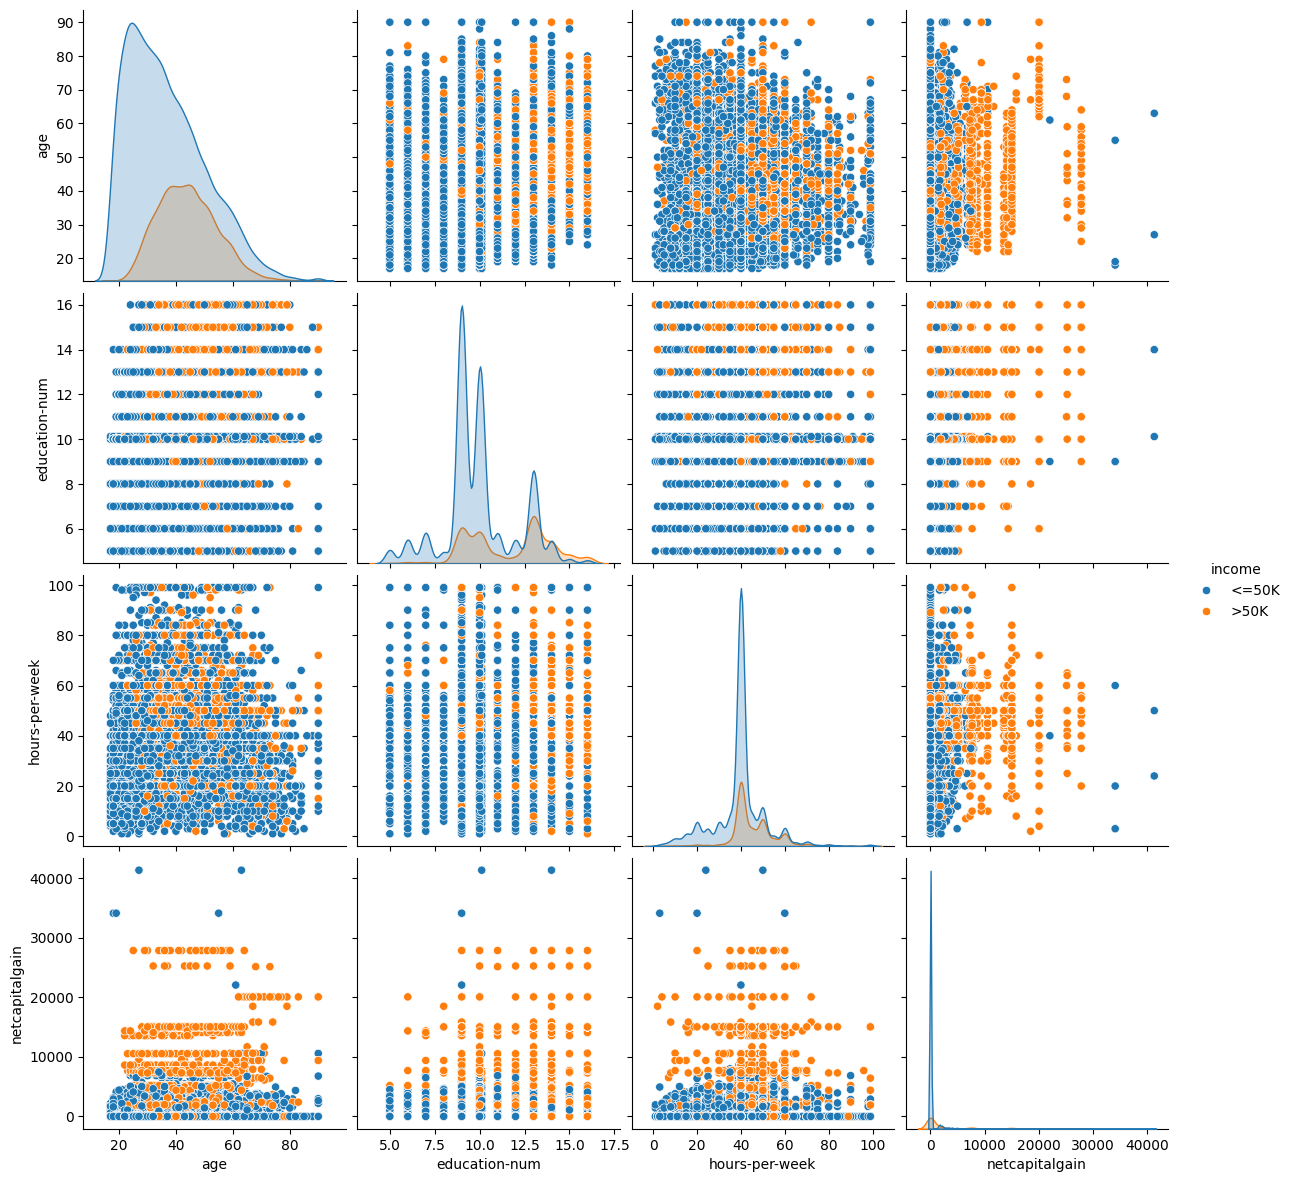

In [ ]:
sns.pairplot(data, height=3, diag_kind = 'kde', hue='income')

#### Correlation heatmap

In [ ]:
# Compute the correlation matrix
corr = data.corr()
f, ax = plt.subplots(figsize=(16, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax = ax, annot=True, linewidth = 0.1)
plt.title('Pearson Correlation of Features', y=1.05, size=15)

ValueError: could not convert string to float: 'Government'

#### Chi-square

In [ ]:
from scipy.stats import chi2_contingency

contigency= pd.crosstab(categorical_attributes['work-class'], categorical_attributes['occupation'])
contigency_pct = pd.crosstab(categorical_attributes['work-class'], categorical_attributes['occupation'], normalize='index')

plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

c, p, dof, expected = chi2_contingency(contigency)
print('Chi2: \n',c)
print('The p-value of the test:\n',p)

#### Cross tabulation

In [ ]:
pd.crosstab(data['work-class'],data['sex'], margins=True)

#### Box plot

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="work-class",y="age", hue="sex", data=data)

#### Group table

In [ ]:
columns = ["age", "work-class", "fnlwgt", "education", "education-num","marital-status", "occupation", "relationship",
           "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
data = pd.read_csv(url, names=columns, sep=',', na_values='?', skipinitialspace =True)

In [ ]:
#Grouping education
data['education'].replace('Preschool', 'Dropout',inplace=True)
data['education'].replace('10th', 'Dropout',inplace=True)
data['education'].replace('11th', 'Dropout',inplace=True)
data['education'].replace('12th', 'Dropout',inplace=True)
data['education'].replace('1st-4th', 'Dropout',inplace=True)
data['education'].replace('5th-6th', 'Dropout',inplace=True)
data['education'].replace('7th-8th', 'Dropout',inplace=True)
data['education'].replace('9th', 'Dropout',inplace=True)
data['education'].replace('HS-Grad', 'HighSchoolGrad',inplace=True)
data['education'].replace('HS-grad', 'HighSchoolGrad',inplace=True)
data['education'].replace('Some-college', 'CommunityCollege',inplace=True)
data['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
data['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
data['education'].replace('Prof-school', 'Masters',inplace=True)
fig = plt.figure(figsize=(20,3))
sns.countplot(x="education", data=data)

In [ ]:
# Grouping native-country
data['native-country'] = data['native-country'].apply(lambda el: "United-States" if el == "United-States" else "Others")
# Plotting count plot for native-country
fig = plt.figure(figsize=(4,5))
sns.countplot(x="native-country", data=data)

#### Dropping the missing values

In [ ]:
#Check missing values
data.info()

In [ ]:
print("missing value count for occupation ", data['occupation'].isnull().sum())
print("missing value count for work-class ", data['work-class'].isnull().sum())
print("missing value count for native-country ", data['native-country'].isnull().sum()) #before was 583

In [ ]:
# Dropping missing values
data = data.dropna()
# Dropping outlier
i = data[data['capital-gain'] > 80000].index
data = data.drop(i)
# Dropping the column fnlwgt
data = data.drop(columns='fnlwgt')
# Combining capital-gain and capital-loss into 1 column
data['netcapitalgain'] = data.apply(lambda x: x['capital-gain'] + x['capital-loss'], axis=1)
data = data.drop(columns='capital-gain')
data = data.drop(columns='capital-loss')
data.info()

In [ ]:
data.describe()

In [ ]:
# Compute the correlation matrix
corr = data.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax = ax, annot=True, linewidth = 0.1)
plt.title('Pearson Correlation of Features', y=1.05, size=15)

#### Drop duplicat values

In [ ]:
#Find duplicates in dataframe
duplicate = data[data.duplicated()]
pd.set_option("display.max_rows", None)
print("Duplicate Rows :")
duplicate.head(10)

In [ ]:
#Drop duplicates
data.drop_duplicates()
#print(main_data.head(10))

In [ ]:
data.hist(bins=30, figsize=(15, 10))

# Exercise - Iris dataset

In [ ]:
url_iris = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns_iris = ["sepal length", "sepal width", "petal length", "petal width", "class"]
data_iris = pd.read_csv(url_iris, names=columns_iris, sep=',', na_values='?', skipinitialspace =True)
data_iris.head()